# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and seaborn.

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for seaborn
sns.set(style="whitegrid")

# Load and Inspect Data
Load the dataset and perform initial inspection to understand its structure and contents.

/tmp/ipykernel_8435/3788283082.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/rossmann-store-sales/train.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


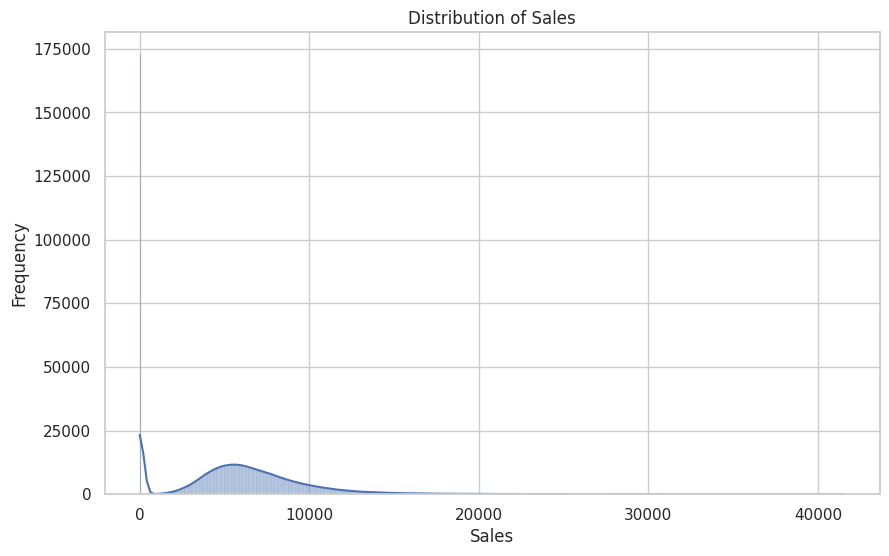

In [7]:
# Load and Inspect Data

# Load the dataset
data = pd.read_csv('../data/rossmann-store-sales/train.csv')

# Display the first few rows of the dataset
data.head()

# Display the summary statistics of the dataset
data.describe()

# Display information about the dataset
data.info()

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

# Display the distribution of the target variable (e.g., sales)
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [12]:

# Load Data
train = pd.read_csv('../data/rossmann-store-sales/train.csv')
test = pd.read_csv('../data/rossmann-store-sales/test.csv')
store = pd.read_csv('../data/rossmann-store-sales/store.csv')

# Inspect Data
print(train.head())
print(test.head())
print(store.head())

# Merge store information with train and test data
train = train.merge(store, on='Store', how='left')
test = test.merge(store, on='Store', how='left')

# Display merged data
print(train.head())
print(test.head())

/tmp/ipykernel_8435/1582764563.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/rossmann-store-sales/train.csv')


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2

# Data Cleaning
Handle missing data and detect and handle outliers to ensure data quality.

In [13]:
# Data Cleaning

# Handle missing data
# Fill missing values for numerical columns with the median
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=[object]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify that there are no more missing values
missing_values_after_cleaning = data.isnull().sum()
missing_values_after_cleaning

# Detect and handle outliers
# Using Z-score to identify outliers
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(data[numerical_cols]))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers from the dataset
data_cleaned = data[(z_scores < threshold).all(axis=1)]

# Verify the shape of the dataset after removing outliers
data_cleaned.shape

(999832, 9)

# Handle Missing Data
Identify and handle missing data using appropriate techniques such as imputation or removal.

In [14]:
# Handle Missing Data

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

# Fill missing values for numerical columns with the median
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing values for categorical columns with the mode
categorical_cols = data.select_dtypes(include=[object]).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify that there are no more missing values
missing_values_after_cleaning = data.isnull().sum()
missing_values_after_cleaning

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [17]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(train[numerical_cols]))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

In [18]:
# Remove outliers from the dataset
train_cleaned = train[(z_scores < threshold).all(axis=1)]

# Verify the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers:", train_cleaned.shape)

Shape of the dataset after removing outliers: (999832, 18)


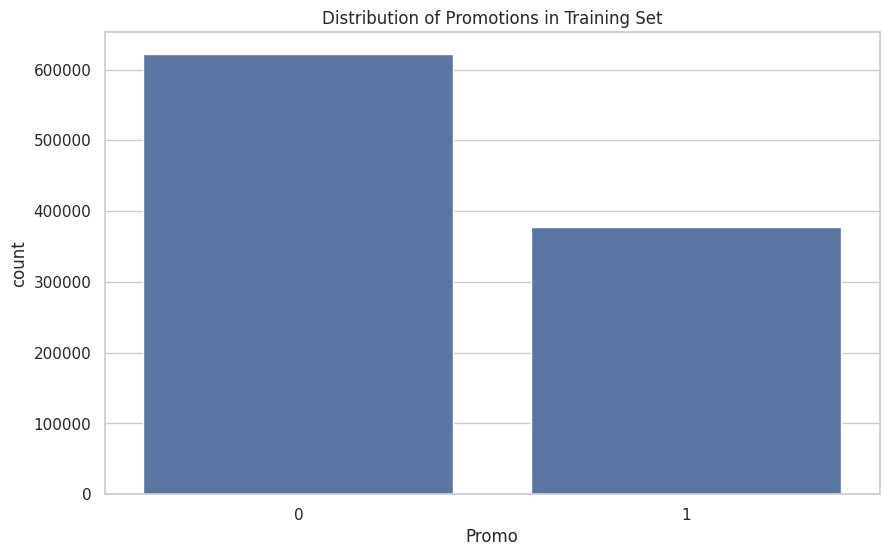

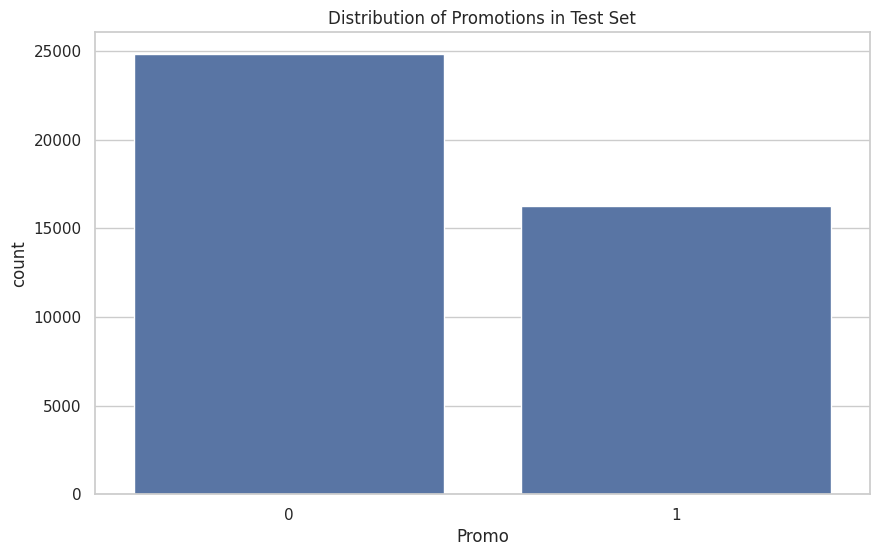

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Promotions in Training Set
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=train_cleaned)
plt.title('Distribution of Promotions in Training Set')
plt.show()

# Distribution of Promotions in Test Set
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=test)
plt.title('Distribution of Promotions in Test Set')
plt.show()

Step 5: Sales Behavior Before, During, and After Holidays

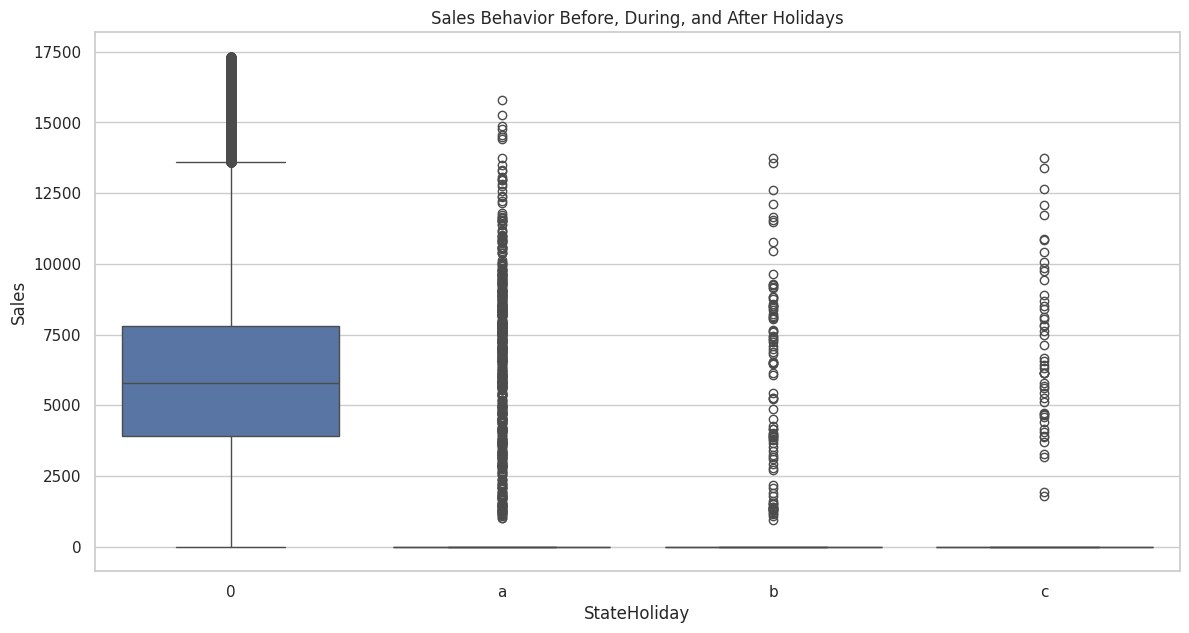

In [20]:
# Sales Behavior Before, During, and After Holidays
plt.figure(figsize=(14, 7))
sns.boxplot(x='StateHoliday', y='Sales', data=train_cleaned)
plt.title('Sales Behavior Before, During, and After Holidays')
plt.show()

Step 6: Seasonal Purchase Behaviors

/tmp/ipykernel_8435/2914538703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Date'] = pd.to_datetime(train_cleaned['Date'])
/tmp/ipykernel_8435/2914538703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['Month'] = train_cleaned['Date'].dt.month


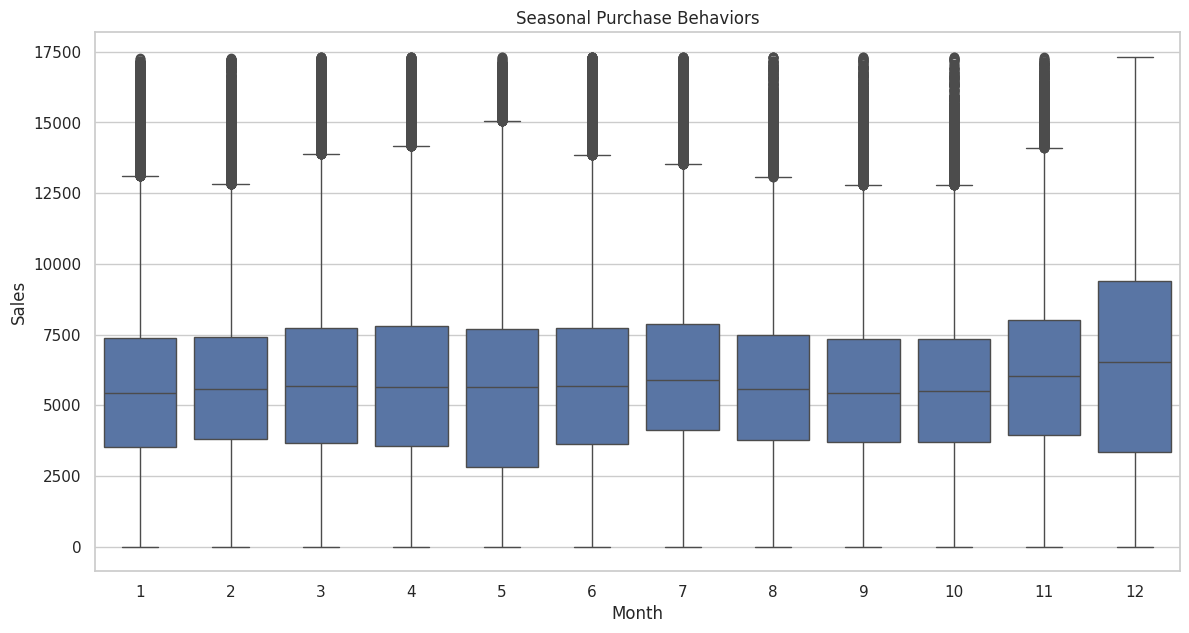

In [ ]:
# Assuming 'Date' column is present and in datetime format
train_cleaned['Date'] = pd.to_datetime(train_cleaned['Date'])
train_cleaned['Month'] = train_cleaned['Date'].dt.month

# Create the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='Sales', data=train_cleaned)
plt.title('Seasonal Purchase Behaviors')
plt.show()


Step 7: Correlation Between Sales and Number of Customers

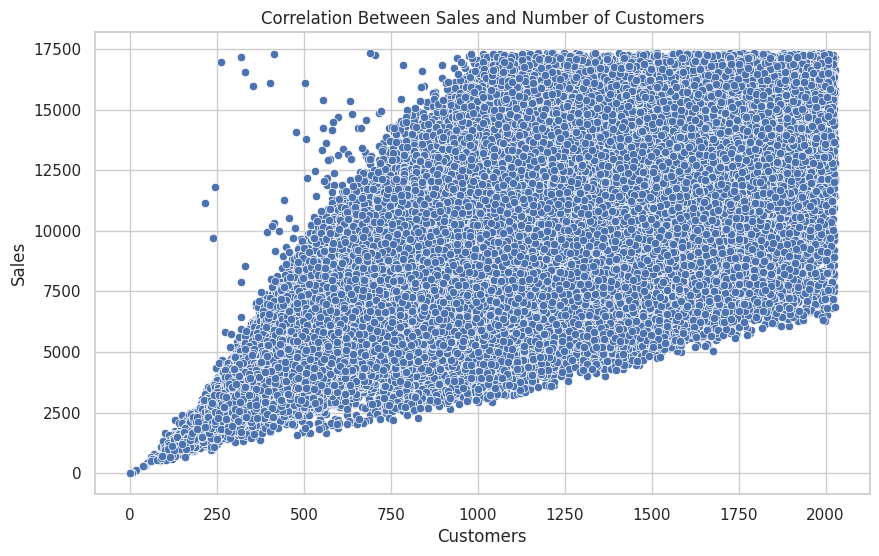

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_cleaned)
plt.title('Correlation Between Sales and Number of Customers')
plt.show()

Step 8: Effect of Promotions on Sales

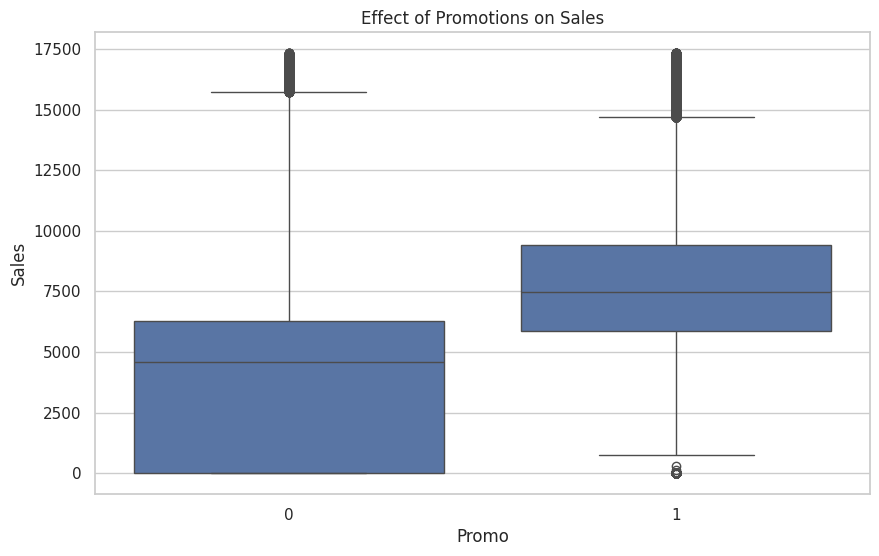

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train_cleaned)
plt.title('Effect of Promotions on Sales')
plt.show()

Step 9: Effective Deployment of Promotions

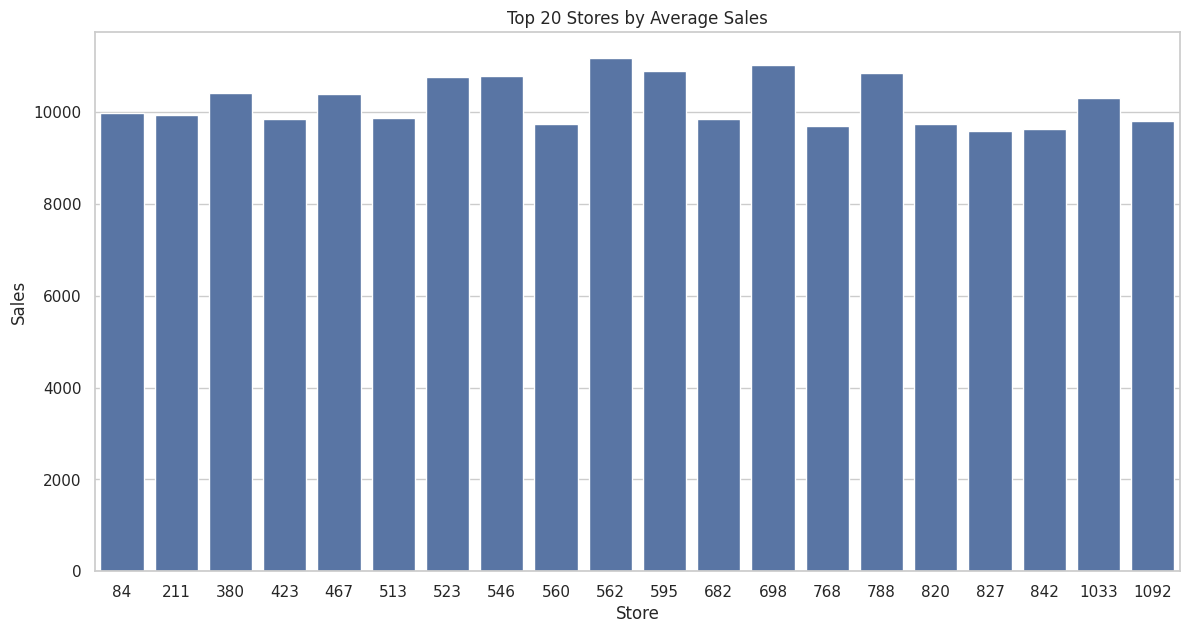

In [25]:
# Analyze which stores should have promotions deployed
promo_effectiveness = train_cleaned.groupby('Store')['Sales'].mean().reset_index()
promo_effectiveness = promo_effectiveness.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='Store', y='Sales', data=promo_effectiveness.head(20))
plt.title('Top 20 Stores by Average Sales')
plt.show()

Step 10: Customer Behavior During Store Opening and Closing Times

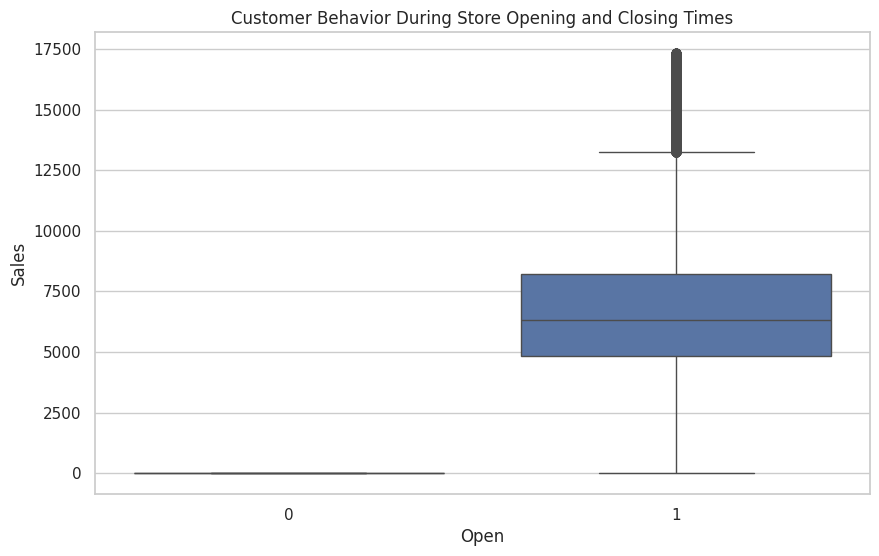

In [26]:
# Assuming 'Open' column indicates if the store is open
plt.figure(figsize=(10, 6))
sns.boxplot(x='Open', y='Sales', data=train_cleaned)
plt.title('Customer Behavior During Store Opening and Closing Times')
plt.show()

Step 11: Sales on Weekends for Stores Open on All Weekdays

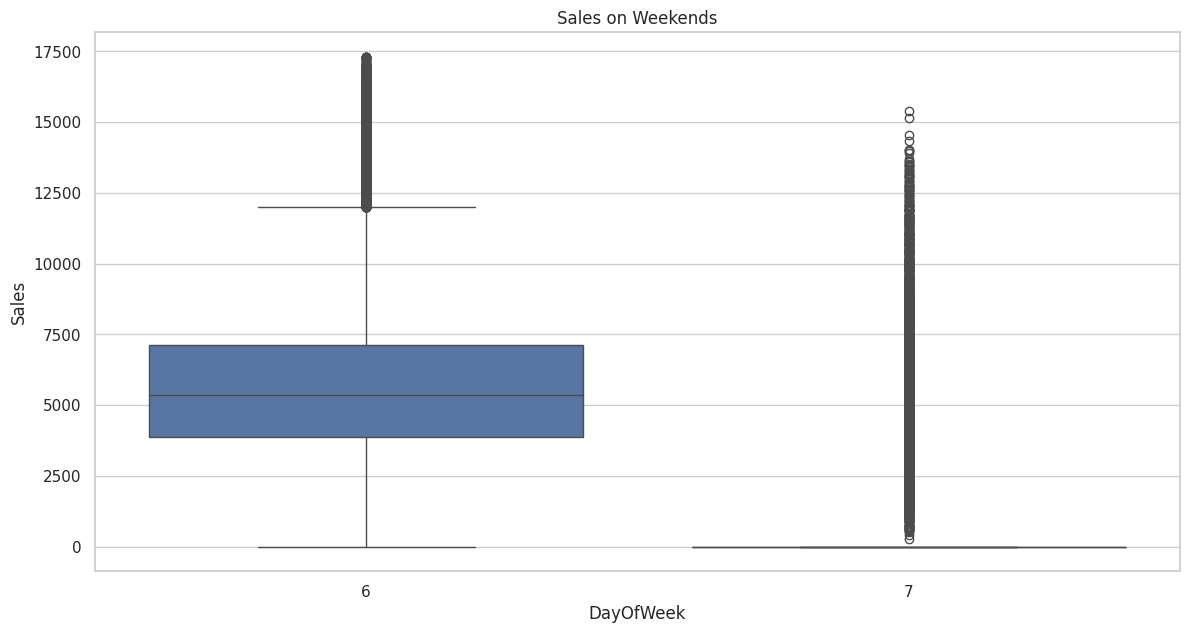

In [27]:
# Assuming 'DayOfWeek' column indicates the day of the week
weekend_sales = train_cleaned[train_cleaned['DayOfWeek'].isin([6, 7])]

plt.figure(figsize=(14, 7))
sns.boxplot(x='DayOfWeek', y='Sales', data=weekend_sales)
plt.title('Sales on Weekends')
plt.show()

Step 12: Effect of Assortment Type on Sales

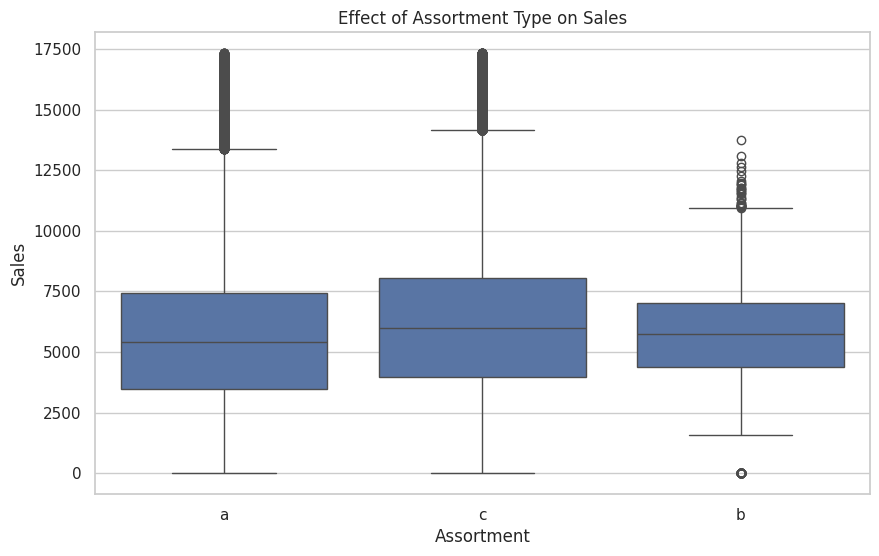

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='Sales', data=train_cleaned)
plt.title('Effect of Assortment Type on Sales')
plt.show()

Step 13: Effect of Distance to Competitors on Sales

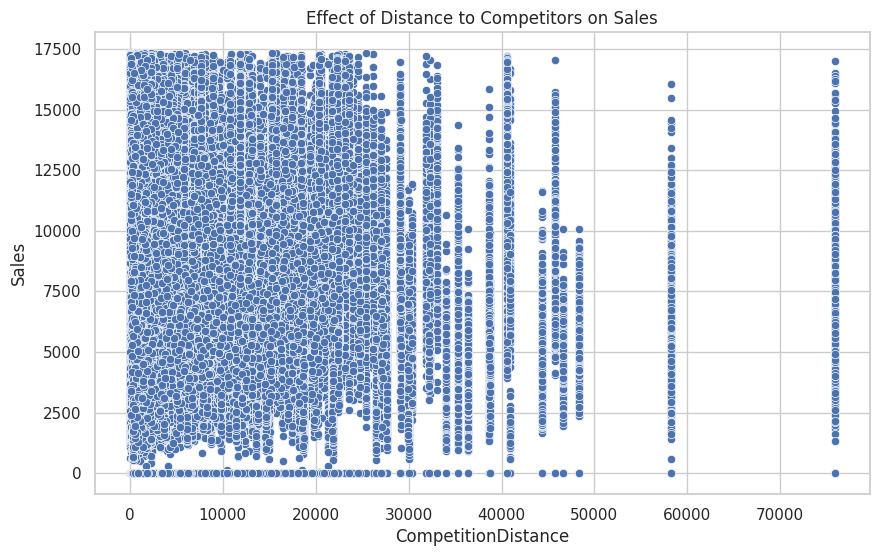

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=train_cleaned)
plt.title('Effect of Distance to Competitors on Sales')
plt.show()

Step 14: Impact of Opening or Reopening of Competitors


In [34]:
# Fill missing values for 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' with a default value
train_cleaned['CompetitionOpenSinceYear'].fillna(1900, inplace=True)
train_cleaned['CompetitionOpenSinceMonth'].fillna(1, inplace=True)

# Convert 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' to integers
train_cleaned['CompetitionOpenSinceYear'] = train_cleaned['CompetitionOpenSinceYear'].astype(int)
train_cleaned['CompetitionOpenSinceMonth'] = train_cleaned['CompetitionOpenSinceMonth'].astype(int)

# Create 'CompetitionOpenSince' column
train_cleaned['CompetitionOpenSince'] = pd.to_datetime(train_cleaned[['CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']].assign(DAY=1))

# Plot the impact of opening or reopening of competitors on sales
plt.figure(figsize=(14, 7))
sns.lineplot(x='CompetitionOpenSince', y='Sales', data=train_cleaned)
plt.title('Impact of Opening or Reopening of Competitors on Sales')
plt.show()

/tmp/ipykernel_8435/3575220390.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_cleaned['CompetitionOpenSinceYear'].fillna(1900, inplace=True)
/tmp/ipykernel_8435/3575220390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned['CompetitionOpenSinceYear'].fillna(1900, inplace=True)
/tmp/ipykernel_8435/3575220390.py:3: Futu

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month,year] is missing